In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

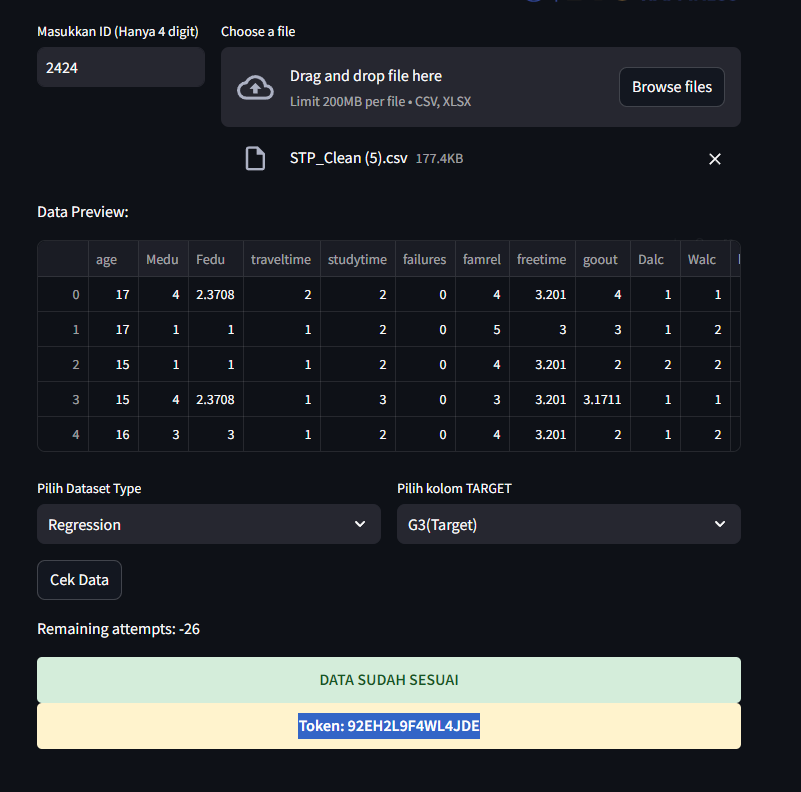

In [3]:
df = pd.read_csv('/content/STP.csv')
df.head()

Unnamed: 0 school sex   age address famsize Pstatus Medu  Fedu     Mjob  \
0           0     GP   F   NaN       U     GT3       A  4.0  -inf  at_home   
1           1     GP   F     -       U     GT3       T  1.0   1.0  at_home   
2           2     GP   F  15.0       U     LE3       T  1.0   1.0  at_home   
3           3     GP   F  15.0       U     GT3       T  4.0   NaN   health   
4           4     GP   F  16.0       U     GT3       T  3.0   3.0    other   

   ... freetime goout Dalc Walc health absences    G1    G2 G3(Target) index  
0  ...      NaN   4.0  1.0  1.0    3.0      4.0   0.0  11.0       11.0     0  
1  ...      3.0   3.0    -  NaN    3.0      2.0   9.0  -inf       11.0     1  
2  ...      NaN   2.0  2.0  NaN    NaN      6.0  12.0  13.0       12.0     2  
3  ...      NaN   NaN  1.0  1.0    5.0      0.0   NaN   inf        NaN     3  
4  ...     -inf   2.0  inf  2.0    5.0      0.0   NaN  13.0       13.0     4  

[5 rows x 35 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         928 non-null    object
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        919 non-null    object
 8   Fedu        928 non-null    object
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  922 non-null    object
 14  studytime   920 non-null    object
 15  failures    922 non-null    object
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

In [5]:
del df['index']
del df['Unnamed: 0']

In [6]:
df.shape

(1044, 33)

In [7]:
# SHOW ME THE PERCENTAGE OF NaNs PRESENT IN EACH COLUMN
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

Kolom hitam memiliki missing values pada kolomnya lebh dari 10%

In [8]:
df.value_counts()

school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1    G2    G3(Target)
GP      F    -inf  R        GT3      A        3.0   2.0   other     other     home        mother    1.0         2.0        0.0       no         yes     yes   no          yes      yes     yes       no        -       3.0       3.0    -     3.0   2.0     4.0       -     10.0  10.0          1
        M    18.0  U        GT3      T        4.0   3.0   teacher   other     course      mother    1.0         3.0        0.0       no         yes     yes   no          yes      yes     yes       yes       5.0     4.0       5.0    -     3.0   5.0     0.0       10.0  10.0  9.0           1
             17.0  U        LE3      T        -     1.0   health    other     course      mother    2.0         1.0        1.0       no         yes     no    yes         yes      yes     yes       no        4.0     4.0       4.0    1.0   2.0   -inf    inf       7.0   9.0   8.0           1
                                              4.0   3.0   health    other     course      mother    2.0         2.0        inf       no         no      no    yes         yes      yes     yes       yes       2.0     5.0       5.0    1.0   4.0   5.0     8.0       15.0  15.0  15.0          1
             18.0  R        GT3      T        2.0   3.0   other     services  reputation  father    1.0         1.0        0.0       no         no      no    no          yes      yes     yes       no        inf     1.0       -inf   4.0   5.0   4.0     13.0      13.0  14.0  14.0          1
                                                                                                                                                                                                                                                                                               ..
        F    inf   U        GT3      T        2.0   3.0   other     other     other       father    2.0         1.0        0.0       no         yes     no    yes         yes      yes     no        no        3.0     5.0       1.0    1.0   inf   5.0     0.0       8.0   7.0   6.0           1
                                              4.0   3.0   teacher   health    home        mother    1.0         3.0        0.0       yes        yes     yes   yes         yes      yes     yes       no        3.0     4.0       4.0    2.0   4.0   4.0     2.0       10.0  9.0   9.0           1
                            LE3      T        2.0   1.0   services  at_home   reputation  mother    1.0         2.0        1.0       no         no      no    no          yes      yes     yes       yes       -       4.0       3.0    1.0   1.0   -inf    12.0      12.0  12.0  13.0          1
        M    -     U        GT3      T        2.0   3.0   other     other     home        mother    -inf        3.0        -         yes        no      no    no          no       yes     yes       no        5.0     3.0       2.0    1.0   2.0   5.0     2.0       10.0  9.0   9.0           1
MS      M    18.0  U        LE3      T        4.0   4.0   teacher   services  other       mother    2.0         3.0        0.0       no         no      no    no          yes      yes     yes       yes       4.0     2.0       -      2.0   2.0   5.0     0.0       15.0  16.0  16.0          1
Name: count, Length: 156, dtype: int64

In [9]:
'''absences	127	12.164751
Medu	125	11.973180
Walc	124	11.877395
studytime	124	11.877395
health	123	11.781609
famrel	122	11.685824
failures	122	11.685824
traveltime	122	11.685824
G1	121	11.590038
freetime	121	11.590038
goout	117	11.206897
age	116	11.111111
Fedu	116	11.111111
G3(Target)	114	10.919540
Dalc	113	10.823755
G2	111	10.632184
'''

'absences\t127\t12.164751\nMedu\t125\t11.973180\nWalc\t124\t11.877395\nstudytime\t124\t11.877395\nhealth\t123\t11.781609\nfamrel\t122\t11.685824\nfailures\t122\t11.685824\ntraveltime\t122\t11.685824\nG1\t121\t11.590038\nfreetime\t121\t11.590038\ngoout\t117\t11.206897\nage\t116\t11.111111\nFedu\t116\t11.111111\nG3(Target)\t114\t10.919540\nDalc\t113\t10.823755\nG2\t111\t10.632184\n'

In [10]:
num_col = ['age','Medu', 'Fedu', 'traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout','Dalc', 'Walc', 'health', 'absences', 'G3(Target)', 'G1', 'G2']

In [11]:
def ganti_nilai(kolom):
    return kolom.replace(['inf', '-inf', '-'], np.nan)
selected = df.columns
df[selected] = df[selected].apply(ganti_nilai)

In [12]:
'''# Replace '-' with NaN
df = df.replace('-', np.nan)

# Replace 'inf' and '-inf' with NaN
df = df.replace('-inf', np.nan)
df = df.replace('inf', np.nan)'''

"# Replace '-' with NaN\ndf = df.replace('-', np.nan)\n\n# Replace 'inf' and '-inf' with NaN\ndf = df.replace('-inf', np.nan)\ndf = df.replace('inf', np.nan)"

In [13]:
missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [14]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].nunique())
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'school':
2
['GP' 'MS']

Nilai unik pada kolom 'sex':
2
['F' 'M']

Nilai unik pada kolom 'age':
8
[nan '15.0' '16.0' '17.0' '19.0' '18.0' '22.0' '20.0' '21.0']

Nilai unik pada kolom 'address':
2
['U' 'R']

Nilai unik pada kolom 'famsize':
2
['GT3' 'LE3']

Nilai unik pada kolom 'Pstatus':
2
['A' 'T']

Nilai unik pada kolom 'Medu':
5
['4.0' '1.0' '3.0' '2.0' nan '0.0']

Nilai unik pada kolom 'Fedu':
5
[nan '1.0' '3.0' '2.0' '4.0' '0.0']

Nilai unik pada kolom 'Mjob':
5
['at_home' 'health' 'other' 'services' 'teacher']

Nilai unik pada kolom 'Fjob':
5
['teacher' 'other' 'services' 'health' 'at_home']

Nilai unik pada kolom 'reason':
4
['course' 'other' 'home' 'reputation']

Nilai unik pada kolom 'guardian':
3
['mother' 'father' 'other']

Nilai unik pada kolom 'traveltime':
4
['2.0' '1.0' nan '3.0' '4.0']

Nilai unik pada kolom 'studytime':
4
['2.0' '3.0' nan '1.0' '4.0']

Nilai unik pada kolom 'failures':
4
['0.0' nan '3.0' '1.0' '2.0']

Nilai unik pada kolom 'schoo

In [15]:
num_col = ["Medu", "absences", "Walc", 'studytime','G1','health','freetime','famrel','Dalc','goout','Fedu','failures','age','traveltime','G2','G2','G3(Target)']
cat_col = [col for col in df.columns if col not in num_col]

cat_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
for col in cat_col:
    modus = df[col].mode()[0]
    df[col].fillna(modus, inplace=True)

In [18]:
num_col = ["Medu", "absences", "Walc", 'studytime','G1','health','freetime','famrel',
           'Dalc','goout','Fedu','failures','traveltime','age','G2','G3(Target)']
missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

<ipython-input-19-039b2b4635e1>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


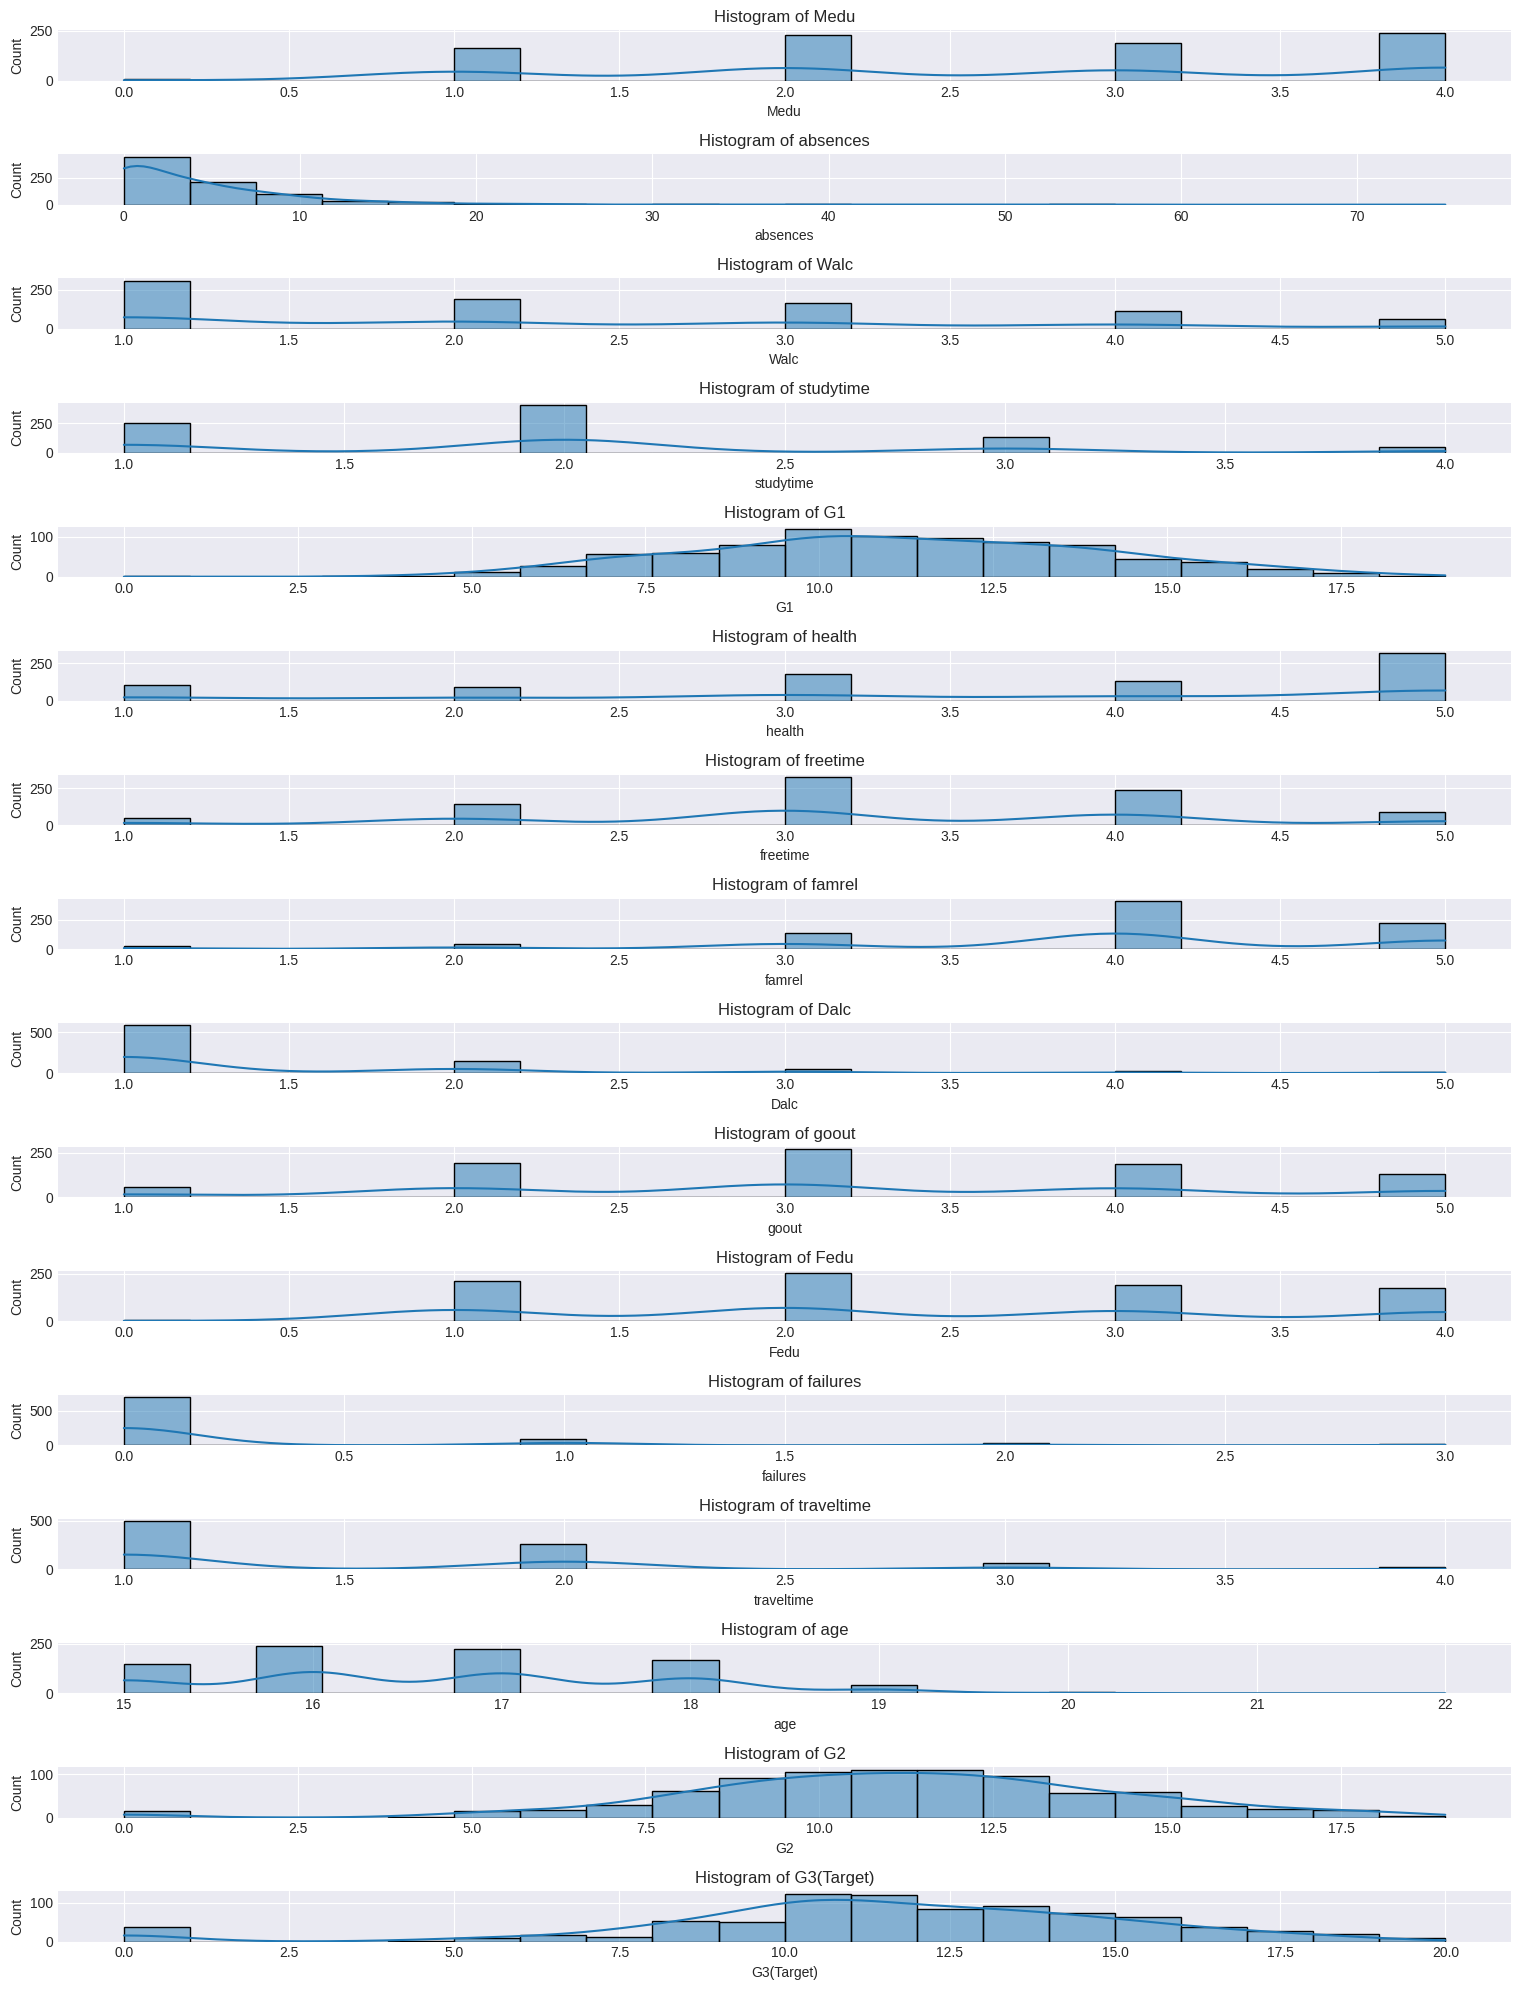

In [19]:
# Set up the plotting environment
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30, 20))

# Loop through the selected variables and create histograms and boxplots
for i, variable in enumerate(num_col):
    plt.subplot(len(num_col), 2, 2*i + 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

In [20]:
num_col_selected = ["absences", "Walc", 'studytime','health','famrel',
           'Dalc','failures','traveltime','age']
for col in num_col_selected:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [21]:
num_col_selected2 = [col for col in num_col if col not in num_col_selected]
for col in num_col_selected2:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

In [22]:
df.head()

school sex   age address famsize Pstatus  Medu      Fedu     Mjob      Fjob  \
0     GP   F  17.0       U     GT3       A   4.0  2.370813  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0  1.000000  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0  1.000000  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0  2.370813   health  services   
4     GP   F  16.0       U     GT3       T   3.0  3.000000    other     other   

   ... famrel  freetime     goout  Dalc  Walc health absences         G1  \
0  ...    4.0  3.200957  4.000000   1.0   1.0    3.0      4.0   0.000000   
1  ...    5.0  3.000000  3.000000   1.0   2.0    3.0      2.0   9.000000   
2  ...    4.0  3.200957  2.000000   2.0   2.0    4.0      6.0  12.000000   
3  ...    3.0  3.200957  3.171053   1.0   1.0    5.0      0.0  11.184211   
4  ...    4.0  3.200957  2.000000   1.0   2.0    5.0      0.0  11.184211   

          G2 G3(Target)  
0  11.000000  11.000000  
1  11.210526  11.000000  
2  13.000000  12.000000  
3  11.210526  11.374402  
4  13.000000  13.000000  

[5 rows x 33 columns]

In [23]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns=cat_col)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1044 non-null   float64
 1   Medu               1044 non-null   float64
 2   Fedu               1044 non-null   float64
 3   traveltime         1044 non-null   float64
 4   studytime          1044 non-null   float64
 5   failures           1044 non-null   float64
 6   famrel             1044 non-null   float64
 7   freetime           1044 non-null   float64
 8   goout              1044 non-null   float64
 9   Dalc               1044 non-null   float64
 10  Walc               1044 non-null   float64
 11  health             1044 non-null   float64
 12  absences           1044 non-null   float64
 13  G1                 1044 non-null   float64
 14  G2                 1044 non-null   float64
 15  G3(Target)         1044 non-null   float64
 16  school_GP          1044 

In [24]:
df.duplicated().sum()

0

In [25]:
df.isna().sum()

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3(Target)           0
school_GP            0
school_MS            0
sex_F                0
sex_M                0
address_R            0
address_U            0
famsize_GT3          0
famsize_LE3          0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_father      0
guardian_mother      0
guardian_other       0
schoolsup_no         0
schoolsup_yes        0
famsup_no            0
famsup_yes           0
paid_no              0
paid_yes             0
activities_no        0
activities_yes       0
nursery_no           0
nursery_yes          0
higher_no            0
higher_yes           0
internet_no          0
internet_yes         0
romantic_no          0
romantic_yes         0
dtype: int64

Text(0, 0.5, 'Values')

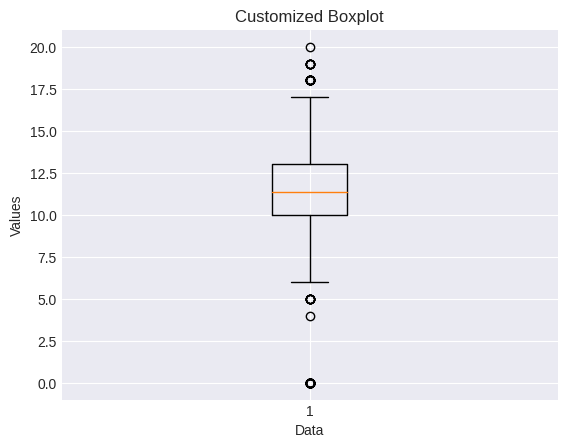

In [28]:
plt.boxplot(df['G3(Target)'])
plt.title("Customized Boxplot")
plt.xlabel("Data")
plt.ylabel("Values")

In [29]:
# Assuming you want to cap outliers to the maximum and minimum values within the whiskers
Q1 = df['G3(Target)'].quantile(0.25)
Q3 = df['G3(Target)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['G3(Target)'] = df['G3(Target)'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

Text(0, 0.5, 'Values')

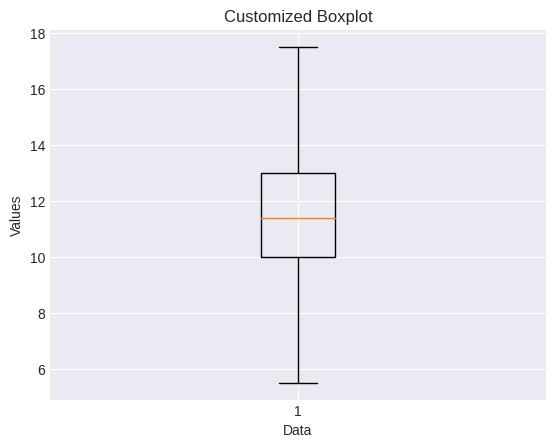

In [30]:
plt.boxplot(df['G3(Target)'])
plt.title("Customized Boxplot")
plt.xlabel("Data")
plt.ylabel("Values")

In [31]:
df.to_csv("STP_Clean.csv", index=False)

In [ ]:
asd

# TRASH

In [ ]:
df.info()

In [ ]:
selected_variables = ["Medu", "absences", "Walc", 'studytime','G1','health','freetime',
                      'famrel','Dalc','goout','Fedu','failures','age','traveltime','G2','G3(Target)']

selected_variables1 = ["Medu", "absences", "Walc", 'studytime','G1','health','freetime',
                      'famrel']

selected_variables2 = ['Dalc','goout','Fedu','failures','age','traveltime','G2','G3(Target)']


In [ ]:
    plt.subplot(len(selected_variables), 2, 2*i + 2)
    sns.boxplot(x=df[variable].dropna())
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

Var 1

In [ ]:
# Set up the plotting environment
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 12))

# Loop through the selected variables and create histograms and boxplots
for i, variable in enumerate(selected_variables1):
    plt.subplot(len(selected_variables1), 2, 2*i + 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

for i, variable in enumerate(selected_variables1):
    plt.subplot(len(selected_variables1), 2, 2*i + 2)
    sns.boxplot(x=df[variable].dropna())
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

In [ ]:
# handle missing value
# selected_variables1 = ["Medu", "absences", "Walc", 'studytime','G1','health','freetime',
#                      'famrel']
# modus
# df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)

# median
df['Medu'].fillna(df['Medu'].median(), inplace=True)
df['absences'].fillna(df['absences'].median(), inplace=True)
df['Walc'].fillna(df['Walc'].median(), inplace=True)
df['studytime'].fillna(df['studytime'].median(), inplace=True)
df['health'].fillna(df['health'].median(), inplace=True)
df['famrel'].fillna(df['famrel'].median(), inplace=True)

# mean
df['G1'].fillna(df['G1'].mean(), inplace=True)
df['freetime'].fillna(df['freetime'].mean(), inplace=True)

In [ ]:
df['absences'].value_counts()

In [ ]:
# Set up the plotting environment
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 12))

# Loop through the selected variables and create histograms and boxplots
for i, variable in enumerate(selected_variables1):
    plt.subplot(len(selected_variables1), 2, 2*i + 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

absences banyak outlier

Var 2

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 12))

for i, variable in enumerate(selected_variables2):
    plt.subplot(len(selected_variables2), 2, 2*i + 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

for i, variable in enumerate(selected_variables2):
    plt.subplot(len(selected_variables2), 2, 2*i + 2)
    sns.boxplot(x=df[variable].dropna())
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

In [ ]:
# selected_variables2 = ['','','','','','','','']

# median
df['Dalc'].fillna(df['Dalc'].median(), inplace=True)
df['failures'].fillna(df['failures'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['traveltime'].fillna(df['traveltime'].median(), inplace=True)

# mean
df['goout'].fillna(df['goout'].mean(), inplace=True)
df['Fedu'].fillna(df['Fedu'].mean(), inplace=True)
df['G2'].fillna(df['G2'].mean(), inplace=True)
df['G3(Target)'].fillna(df['G3(Target)'].mean(), inplace=True)

In [ ]:
df['failures'].value_counts()

failures detected outlier

In [ ]:
for col in df.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(df[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
#one-hot encoded
df = pd.get_dummies(df, drop_first=True)

# Mengonversi semua kolom bertipe bool menjadi numerik (int)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df.info()

In [ ]:
df_encoded = df

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

columns_to_scaler = ['age','G1', 'G2', 'G3(Target)']

# Create a RobustScaler object
scaler = StandardScaler()

# Fit the scaler to the target variable
scaler.fit(df[columns_to_scaler])

# Transform the target variable
df[columns_to_scaler] = scaler.transform(df[columns_to_scaler])

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# del df['G3(Target)']

In [ ]:
df.to_csv("STP_Clean1.csv", index=False)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df['Fedu'].value_counts()

In [ ]:
dsa

In [ ]:
df[selected_variables].head()

In [ ]:
Medu	153	14.655172
absences	152	14.559387
Walc	151	14.463602
studytime	151	14.463602
G1	150	14.367816
health	150	14.367816
freetime	149	14.272031
famrel	148	14.176245
Dalc	148	14.176245
goout	148	14.176245
Fedu	147	14.080460
failures	147	14.080460
age	145	13.888889
traveltime	145	13.888889
G2	143	13.697318
G3(Target)	141	13.505747

In [ ]:
asd

In [ ]:
# num_col = ['age','Medu', 'Fedu', 'traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout','Dalc', 'Walc', 'health', 'absences', 'G3(Target)', 'G1', 'G2']
# df[num_col] = df[num_col].astype('float64')

In [ ]:
df.duplicated().sum() # save!

In [ ]:
df['absences'].unique()

In [ ]:
sns.displot(data=df, x="absences", bins=20)

In [ ]:
df.info()

In [ ]:
df['G3(Target)'].unique()

In [ ]:
# Mengganti nilai NaN, inf, -inf, dan '-' dengan NaN untuk pembersihan
df.replace(['-', 'inf', '-inf'], np.nan, inplace=True)

In [ ]:
df['G3(Target)'].unique()

In [ ]:
# Ubah kolom yang seharusnya numerik dari 'object' menjadi 'float'
cols_to_numeric = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

df[cols_to_numeric] = df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isnull().sum()

In [ ]:
fig, axes = plt.subplots(nrows=len(cols_to_numeric), figsize=(10, 5*len(cols_to_numeric)))

for i, col in enumerate(cols_to_numeric):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [ ]:
# absence not normal

In [ ]:
# Mengisi nilai NaN dengan median untuk kolom numerik
df[cols_to_numeric] = df[cols_to_numeric].fillna(df[cols_to_numeric].median())

# Mengisi nilai NaN untuk kolom kategorikal dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df.info()

In [ ]:
'''# Jika hanya ingin label encoding pada beberapa kolom
from sklearn.preprocessing import LabelEncoder

label_enc_cols = [M'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
le = LabelEncoder()

for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])'''

In [ ]:
df

In [ ]:
df.nunique()

In [ ]:
df['GAvg'] = (df['G1'] + df['G2'] + df['G3(Target)']) / 3

In [ ]:
def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= (0.9 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('A')
        # else, if more than a value,
        elif row >= (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('B')
        # else, if more than a value,
        elif row < (0.7 * df['GAvg'].max()):
            # Append a letter grade
            grades.append('C')
    # Create a column from the list
    df['grades'] = grades
    return df

In [ ]:
df = define_grade(df)
df.head()

In [ ]:
df.drop(["school","age"], axis=1, inplace=True)

In [ ]:
df.describe()

In [ ]:
df['schoolsup'].value_counts()

In [ ]:
# for yes / no values:
d = {'yes': 1, 'no': 0}
df['schoolsup'] = df['schoolsup'].map(d)


In [ ]:
df['schoolsup'].value_counts()

In [ ]:
df['famsup'] = df['famsup'].map(d)
df['paid'] = df['paid'].map(d)
df['activities'] = df['activities'].map(d)
df['nursery'] = df['nursery'].map(d)
df['higher'] = df['higher'].map(d)
df['internet'] = df['internet'].map(d)
df['romantic'] = df['romantic'].map(d)

In [ ]:
# map the sex data
d = {'F': 1, 'M': 0}
df['sex'] = df['sex'].map(d)

# map the address data
d = {'U': 1, 'R': 0}
df['address'] = df['address'].map(d)

# map the famili size data
d = {'LE3': 1, 'GT3': 0}
df['famsize'] = df['famsize'].map(d)

# map the parent's status
d = {'T': 1, 'A': 0}
df['Pstatus'] = df['Pstatus'].map(d)

# map the parent's job
d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
df['Mjob'] = df['Mjob'].map(d)
df['Fjob'] = df['Fjob'].map(d)

# map the reason data
d = {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
df['reason'] = df['reason'].map(d)

# map the guardian data
d = {'mother': 0, 'father': 1, 'other': 2}
df['guardian'] = df['guardian'].map(d)

# map the grades data
d = {'C': 0, 'B': 1, 'A': 2}
df['grades'] = df['grades'].map(d)

In [ ]:
df.nunique()

In [ ]:
student_features = df.columns.tolist()
student_features.remove('grades')
student_features.remove('GAvg')
student_features.remove('G1')
student_features.remove('G2')
student_features.remove('G3(Target)')
student_features

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
X = df[student_features].copy()
X.columns

y=df[['grades']].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [ ]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

In [ ]:
predictions = grade_classifier.predict(X_test)

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
y

In [ ]:
df.info()

In [ ]:
df['grades'].value_counts()

In [ ]:
df.info()

In [ ]:
df.to_csv('STP_Clean.csv', index=False)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



---



In [ ]:
sd

In [ ]:
df.groupby('higher').mean()

In [ ]:
asd

In [ ]:
# Lakukan one-hot encoding untuk semua kolom kategorikal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df = df.astype(int)

In [ ]:
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
plt.boxplot(df.G1)
plt.show()

In [ ]:
# List kolom numerik (sesuaikan dengan kolom Anda)
numeric_cols = ['G1', 'G2', 'G3(Target)', 'age', 'Medu', 'Fedu']

# Membuat figure dengan beberapa subplot
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, 4*len(numeric_cols)))

# Membuat box plot untuk setiap kolom
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

In [ ]:
df.isnull().any()

In [ ]:
df['age'].value_counts()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.imshow(df.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

In [ ]:
col_num = df.corr()['G3(Target)'].apply(abs).sort_values()
col_num

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
# Data groupBy()... grouping The Data For higher Grades

df.groupby('higher').mean()

In [ ]:
selected_features = col_num[-20:].index

selected_features = list(selected_features)

selected_features

In [ ]:
limited_df = df[selected_features]

In [ ]:
limited_df.head()

In [ ]:
predict = "G3(Target)"
limited_df

In [ ]:

# This line defines the target variable, which is the variable that the model will be trained to predict. In this case, the target variable is G3, which represents the final grade
x = np.array(limited_df.drop([predict], axis=1)) # This line separates the features from the target variable
y = np.array(limited_df[predict]) # This line extracts the target variable from the DataFrame and converts it to a NumPy array.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)

accuracy = linear_regression.score(xtest, ytest)
print(accuracy)

In [ ]:
'''# Assuming you have a DataFrame named df and a list of categorical columns called categorical_cols

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label encode specific columns
label_enc_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
le = LabelEncoder()

for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Convert bool dtype to object
df = df.astype({col: 'object' for col in df.select_dtypes(include='bool').columns})'''

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[cols_to_numeric] = scaler.fit_transform(df[cols_to_numeric])

In [ ]:
df.info()  # Memeriksa tipe data dan non-null count
df.describe()

In [ ]:
sns.kdeplot(df.loc[df['sex']=='F', 'G3(Target)'], label='F', color='#ff9999')
sns.kdeplot(df.loc[df['sex']=='M', 'G3(Target)'], label='M', color='#004c99')

plt.title('Female Vs Male')
plt.xlabel('Final Grade (G3)')
plt.legend()

plt.show()

In [ ]:


# Konversi kolom yang memiliki dtype object menjadi numeric
# errors='coerce' akan mengubah nilai yang tidak dapat dikonversi menjadi NaN
cols_to_convert = [ 'Age', 'RoomService', 'FoodCourt',
                   'ShoppingMall', 'Spa', 'VRDeck']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')